# Lab 1: Text & Speech Processing with Python - Customer Support Analysis

## Objective

This lab focuses on applying fundamental **Natural Language Processing (NLP)** techniques to analyze customer support interactions in the telecommunications industry. Through this hands-on session, you will:

- Learn to implement various text preprocessing techniques.
- Utilize popular NLP libraries: **NLTK** and **spaCy**.
- Perform **Named Entity Recognition (NER)**.
- Create meaningful visualizations of text data.
- Explore **speech-to-text conversion** using pretrained models.


## Dataset Description

We'll be working with a **Twitter Customer Support dataset** containing real interactions between customers and various support handles.

### Data Dictionary

- **tweet_id**: Unique identifier for each tweet  
- **author_id**: Username of the tweet author  
- **inbound**: Boolean flag indicating if the tweet is from a customer (`TRUE`) or support handle (`FALSE`)  
- **created_at**: Timestamp of the tweet  
- **text**: Content of the tweet  
- **response_tweet_id**: ID of the response tweet, if applicable  
- **in_response_to_tweet_id**: ID of the tweet this is responding to

## Tasks Overview

### 1. Text Preprocessing

### 2. Word Clouds and Text Pattern Analysis

### 3. Named Entity Recognition (NER)

### 4. Pattern Analysis and Issue Classification

### 5. Advanced Text Analysis

### 6. Speech Processing




In [8]:
# Install required packages
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install wordcloud
!pip install gTTS
!pip install SpeechRecognition
!pip install pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.4 MB/s eta 0:00:00


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
import spacy
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from gtts import gTTS
import speech_recognition as sr


## Task 1: Text Preprocessing

### Understanding Text Preprocessing

Text preprocessing is a crucial step in **Natural Language Processing (NLP)** that involves cleaning and standardizing text data to make it suitable for analysis. Key preprocessing steps include:

- **Tokenization**: Breaking text into individual words or tokens.  
- **Lowercasing**: Converting all text to lowercase to ensure consistency.  
- **Special Character Removal**: Removing punctuation, URLs, and other non-textual elements.  
- **Stop Word Removal**: Eliminating common words that don't carry significant meaning.  
- **Lemmatization**: Converting words to their base or dictionary form.  


In [19]:
# Download required NLTK data
nltk.download('punkt_tab')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
# Load the dataset
df = pd.read_csv('/content/sample.csv')

In [22]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head(2))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     bool   
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.6+ KB
None

Sample Data:
   tweet_id     author_id  inbound                      created_at  \
0    119237        105834     True  Wed Oct 11 06:55:44 +0000 2017   
1    119238  ChaseSupport    False  Wed Oct 11 13:25:49 +0000 2017   

                                                text response_tweet_id  \
0  @AppleSupport causin

In [23]:
# Basic text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text


In [24]:
# Apply cleaning to text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display sample of original vs cleaned text
print("\nOriginal vs Cleaned Text Comparison:")
comparison_df = pd.DataFrame({
    'Original': df['text'].head(),
    'Cleaned': df['cleaned_text'].head()
})
print(comparison_df)


Original vs Cleaned Text Comparison:
                                            Original  \
0  @AppleSupport causing the reply to be disregar...   
1  @105835 Your business means a lot to us. Pleas...   
2  @76328 I really hope you all change but I'm su...   
3  @105836 LiveChat is online at the moment - htt...   
4  @VirginTrains see attached error message. I've...   

                                             Cleaned  
0  causing the reply to be disregarded and the ta...  
1  your business means a lot to us please dm your...  
2  i really hope you all change but im sure you w...  
3  livechat is online at the moment   or contact ...  
4  see attached error message ive tried leaving a...  


In [25]:
# Function for NLTK preprocessing
def preprocess_with_nltk(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

In [26]:
# Apply NLTK preprocessing
df['processed_tokens'] = df['cleaned_text'].apply(preprocess_with_nltk)

# Get word frequency distribution
all_words = [word for tokens in df['processed_tokens'] for word in tokens]
word_freq = Counter(all_words)

print("\nMost Common Words:")
print(word_freq.most_common(10))


Most Common Words:
[('u', 25), ('help', 20), ('dm', 19), ('thanks', 13), ('please', 11), ('ive', 9), ('phone', 9), ('version', 9), ('hi', 9), ('look', 8)]


### 2. Word Clouds and Text Pattern Analysis


Customer Messages Word Cloud:


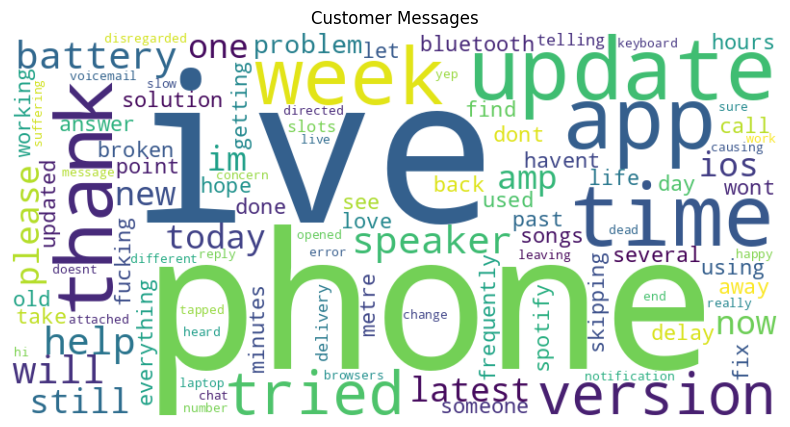


Support Messages Word Cloud:


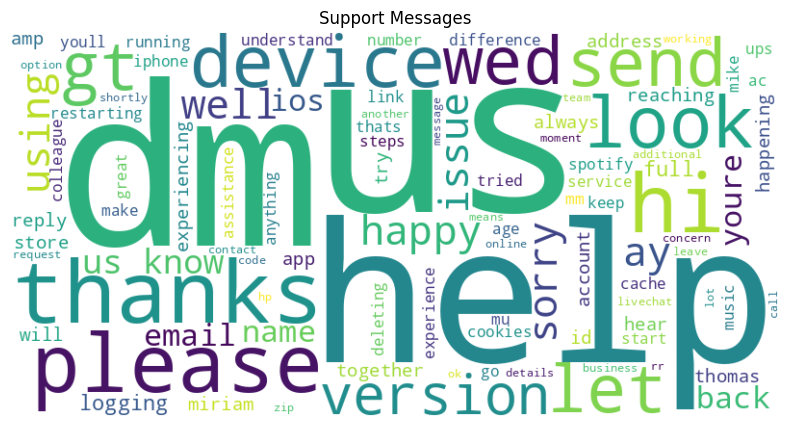

In [27]:
# Separate customer and support messages
customer_texts = ' '.join(df[df['inbound'] == True]['cleaned_text'])
support_texts = ' '.join(df[df['inbound'] == False]['cleaned_text'])

# Function to generate word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=100,
        min_font_size=10
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds
print("Customer Messages Word Cloud:")
create_wordcloud(customer_texts, 'Customer Messages')

print("\nSupport Messages Word Cloud:")
create_wordcloud(support_texts, 'Support Messages')

In [28]:
# Function to extract bigrams (word pairs)
def get_bigrams(text):
    tokens = nltk.word_tokenize(text.lower())
    bigrams = list(nltk.bigrams(tokens))
    return Counter(bigrams)

# Analyze common phrases in customer and support messages
customer_bigrams = get_bigrams(customer_texts)
support_bigrams = get_bigrams(support_texts)

print("\nCommon Customer Phrases:")
print(pd.DataFrame(customer_bigrams.most_common(10), columns=['Phrase', 'Count']))

print("\nCommon Support Phrases:")
print(pd.DataFrame(support_bigrams.most_common(10), columns=['Phrase', 'Count']))


Common Customer Phrases:
             Phrase  Count
0       (my, phone)      6
1        (for, the)      4
2      (ive, tried)      3
3           (i, am)      3
4         (of, the)      3
5          (i, get)      3
6         (i, have)      3
7          (to, be)      2
8        (have, to)      2
9  (several, times)      2

Common Support Phrases:
          Phrase  Count
0      (we, can)     10
1     (to, help)      8
2     (are, you)      7
3        (us, a)      6
4        (a, dm)      6
5   (please, dm)      5
6  (thanks, for)      5
7    (happy, to)      5
8       (so, we)      5
9   (look, into)      5



Message Characteristics Analysis:
        message_length        word_count      
                  mean    std       mean   std
inbound                                       
False           107.25  23.59      21.18  4.43
True             86.88  33.26      16.65  6.75


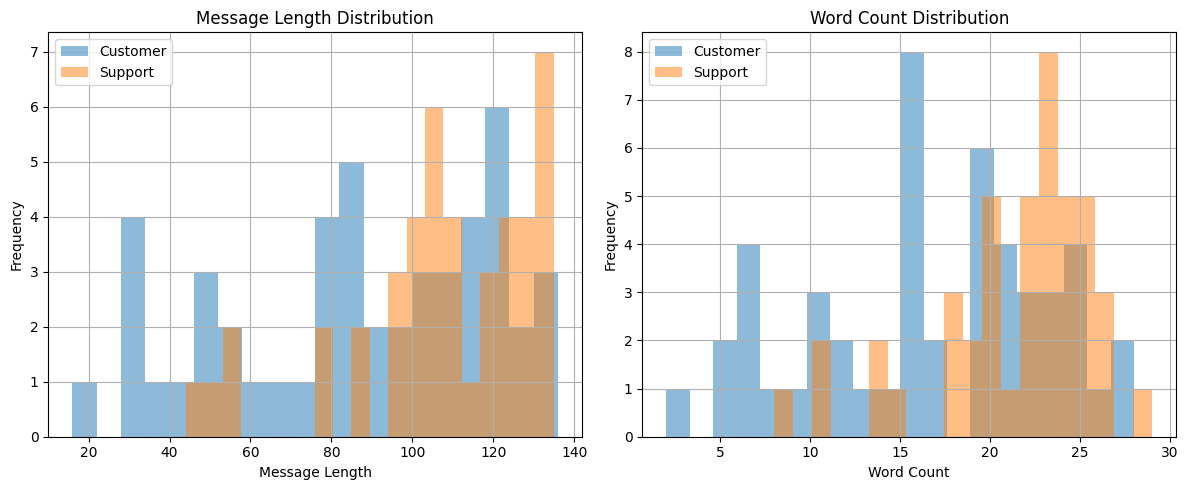

In [29]:
# Add message length analysis
df['message_length'] = df['cleaned_text'].str.len()
df['word_count'] = df['cleaned_text'].str.split().str.len()

# Compare characteristics between customer and support messages
analysis = df.groupby('inbound').agg({
    'message_length': ['mean', 'std'],
    'word_count': ['mean', 'std']
}).round(2)

print("\nMessage Characteristics Analysis:")
print(analysis)

# Visualize message length distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df[df['inbound']]['message_length'].hist(alpha=0.5, bins=20, label='Customer')
df[~df['inbound']]['message_length'].hist(alpha=0.5, bins=20, label='Support')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
df[df['inbound']]['word_count'].hist(alpha=0.5, bins=20, label='Customer')
df[~df['inbound']]['word_count'].hist(alpha=0.5, bins=20, label='Support')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# Let's first verify the response structure
print("Sample of response relationships:")
print(df[['tweet_id', 'response_tweet_id', 'in_response_to_tweet_id']].head(10))

# Modified response time analysis code
def calculate_response_times(df):
    # Convert created_at to datetime
    df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

    # Create a mapping of tweet_id to row data
    tweet_map = df.set_index('tweet_id').to_dict('index')

    response_times = []
    for idx, row in df.iterrows():
        if pd.notna(row['in_response_to_tweet_id']):
            # This is a response tweet
            original_tweet_id = str(int(row['in_response_to_tweet_id']))
            if original_tweet_id in tweet_map:
                original_time = tweet_map[original_tweet_id]['created_at']
                response_time = row['created_at']
                time_diff = (response_time - original_time).total_seconds() / 60
                if time_diff > 0:  # Only include positive time differences
                    response_times.append(time_diff)

    return response_times

response_times = calculate_response_times(df)

print("\nResponse Time Analysis:")
if response_times:
    print(f"Number of response pairs analyzed: {len(response_times)}")
    print(f"Average response time: {np.mean(response_times):.2f} minutes")
    print(f"Median response time: {np.median(response_times):.2f} minutes")
    print(f"Minimum response time: {np.min(response_times):.2f} minutes")
    print(f"Maximum response time: {np.max(response_times):.2f} minutes")

    # Visualize response time distribution
    plt.figure(figsize=(10, 5))
    plt.hist(response_times, bins=20, edgecolor='black')
    plt.title('Distribution of Response Times')
    plt.xlabel('Response Time (minutes)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No valid response pairs found in the dataset")

# Let's also analyze the conversation patterns
print("\nConversation Analysis:")
print(f"Total tweets: {len(df)}")
print(f"Customer tweets: {len(df[df['inbound']])}")
print(f"Support tweets: {len(df[~df['inbound']])}")
print(f"Tweets with responses: {len(df[df['response_tweet_id'].notna()])}")
print(f"Tweets responding to others: {len(df[df['in_response_to_tweet_id'].notna()])}")

Sample of response relationships:
   tweet_id response_tweet_id  in_response_to_tweet_id
0    119237            119236                      NaN
1    119238               NaN                 119239.0
2    119239            119238                      NaN
3    119240            119241                 119242.0
4    119241            119243                 119240.0
5    119243            119244                 119241.0
6    119244            119245                 119243.0
7    119245               NaN                 119244.0
8    119242            119240                 119246.0
9    119246            119242                 119247.0

Response Time Analysis:
No valid response pairs found in the dataset

Conversation Analysis:
Total tweets: 93
Customer tweets: 49
Support tweets: 44
Tweets with responses: 65
Tweets responding to others: 68


In [35]:
# Quick data check
print("\nUnique Support Handles:")
support_handles = df[~df['inbound']]['author_id'].unique()
print(support_handles)

print("\nSample Conversation Thread:")
# Get a sample conversation
sample_tweet = df[df['response_tweet_id'].notna()].iloc[0]
thread_ids = [sample_tweet['tweet_id']]
if pd.notna(sample_tweet['response_tweet_id']):
    thread_ids.append(sample_tweet['response_tweet_id'])

print(df[df['tweet_id'].isin(thread_ids)][['author_id', 'text', 'created_at']])


Unique Support Handles:
['ChaseSupport' 'VirginTrains' 'AppleSupport' 'SpotifyCares'
 'British_Airways' 'O2' 'comcastcares' 'sprintcare' 'SouthwestAir'
 'Ask_Spectrum' 'Tesco' 'HPSupport' 'UPSHelp']

Sample Conversation Thread:
  author_id                                               text  \
0    105834  @AppleSupport causing the reply to be disregar...   

           created_at  
0 2017-10-11 06:55:44  


Support Handle Activity:
author_id
AppleSupport       13
SpotifyCares        8
Tesco               8
VirginTrains        4
British_Airways     3
ChaseSupport        1
O2                  1
comcastcares        1
sprintcare          1
SouthwestAir        1
Ask_Spectrum        1
HPSupport           1
UPSHelp             1
Name: count, dtype: int64

Conversation Statistics:
Total conversations: 66
Average responses per conversation: 1.03
Max responses in a conversation: 2


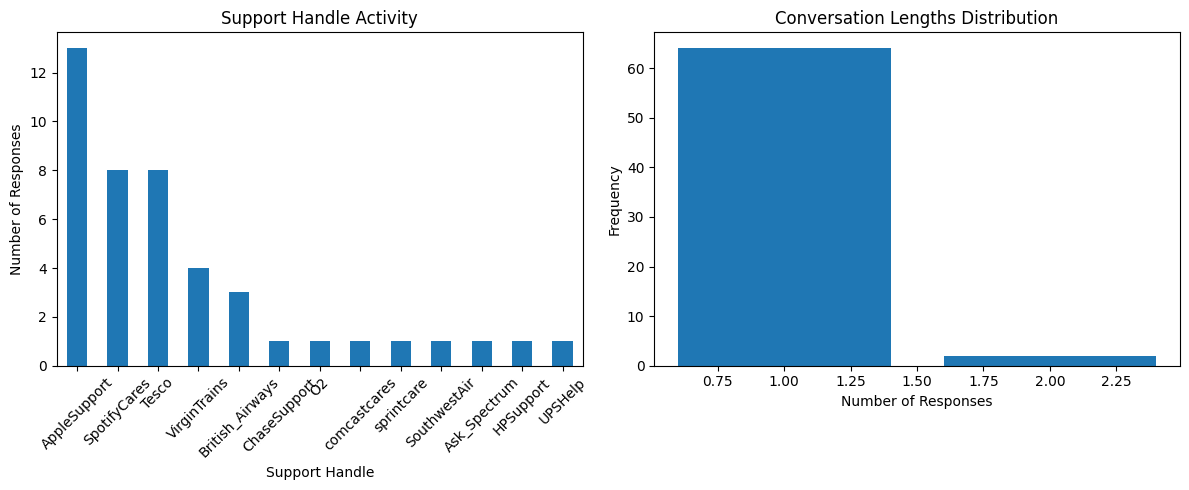


Response Pattern Analysis:
                Message Length        Has Link Mentions DM
                          mean    std     mean        mean
Support Handle                                            
AppleSupport            141.31  19.39     0.92        0.92
Ask_Spectrum            148.00    NaN     1.00        1.00
British_Airways         128.00  32.92     0.00        0.00
ChaseSupport            141.00    NaN     1.00        1.00
HPSupport               161.00    NaN     1.00        0.00
O2                      133.00    NaN     1.00        1.00
SouthwestAir            140.00    NaN     0.00        0.00
SpotifyCares            122.62  30.32     0.12        0.12
Tesco                   135.00  15.97     0.00        0.25
UPSHelp                 155.00    NaN     1.00        0.00
VirginTrains             95.75  38.37     0.50        0.00
comcastcares            145.00    NaN     0.00        1.00
sprintcare              137.00    NaN     0.00        1.00


In [37]:
# conversation analysis
def analyze_conversations():
    # Convert created_at to datetime if not already
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Analyze support handle activity
    support_activity = df[~df['inbound']]['author_id'].value_counts()

    # Analyze conversation patterns
    conversations = {}
    for idx, row in df.iterrows():
        if pd.notna(row['in_response_to_tweet_id']):
            original_id = str(int(row['in_response_to_tweet_id']))
            if original_id not in conversations:
                conversations[original_id] = []
            conversations[original_id].append(row['tweet_id'])

    # Calculate conversation lengths
    conv_lengths = [len(responses) for responses in conversations.values()]

    return support_activity, conv_lengths

# Get conversation statistics
support_activity, conv_lengths = analyze_conversations()

# Display results
print("Support Handle Activity:")
print(support_activity)

print("\nConversation Statistics:")
print(f"Total conversations: {len(conv_lengths)}")
print(f"Average responses per conversation: {np.mean(conv_lengths):.2f}")
print(f"Max responses in a conversation: {np.max(conv_lengths)}")

# Visualize support handle activity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
support_activity.plot(kind='bar')
plt.title('Support Handle Activity')
plt.xlabel('Support Handle')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)

# Visualize conversation lengths
plt.subplot(1, 2, 2)
plt.hist(conv_lengths, bins=range(min(conv_lengths), max(conv_lengths) + 2, 1),
         align='left', rwidth=0.8)
plt.title('Conversation Lengths Distribution')
plt.xlabel('Number of Responses')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analyze response patterns by support handle
response_patterns = pd.DataFrame({
    'Support Handle': df[~df['inbound']]['author_id'],
    'Message Length': df[~df['inbound']]['text'].str.len(),
    'Has Link': df[~df['inbound']]['text'].str.contains('http'),
    'Mentions DM': df[~df['inbound']]['text'].str.contains('DM|dm|direct message', case=False)
})

print("\nResponse Pattern Analysis:")
pattern_summary = response_patterns.groupby('Support Handle').agg({
    'Message Length': ['mean', 'std'],
    'Has Link': 'mean',
    'Mentions DM': 'mean'
}).round(2)
print(pattern_summary)

## Word Cloud Analysis

- **Customer messages** frequently mention device-related terms such as:
  - "phone"
  - "update"
  - "app"
  - "version"

- **Support messages** display customer service language patterns, including:
  - "thanks"
  - "please"
  - "dm"
  - "help"

---

## Message Characteristics

- **Message Length**:
  - Support messages are typically **longer** (mean: **107.25 chars**) compared to customer messages (mean: **86.88 chars**).
  - Support messages have more **consistent length** (std: **23.59**) than customer messages (std: **33.26**).

- **Word Count**:
  - Support staff use **more words per message** (mean: **21.18 words**) compared to customers (mean: **16.65 words**).

---

## Support Handle Analysis

- **Most Active Handles**:
  - **AppleSupport** is the most active with **13 responses**.
  - **SpotifyCares** and **Tesco** are tied for second place with **8 responses each**.

- **Response Characteristics**:
  - Most handles frequently include **links** and **DM requests** in their responses.


# Task 3: Named Entity Recognition and Pattern Analysis

In [38]:
import spacy
from spacy.tokens import Span
from spacy.util import filter_spans


In [39]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Custom entity patterns for telecom/tech support
tech_patterns = [
    {"label": "DEVICE", "pattern": [{"LOWER": {"IN": ["phone", "iphone", "app", "speaker", "tablet"]}}]},
    {"label": "ISSUE", "pattern": [{"LOWER": {"IN": ["broken", "slow", "error", "issue", "problem", "bug"]}}]},
    {"label": "VERSION", "pattern": [{"LOWER": "version"}, {"LIKE_NUM": True}]},
    {"label": "ACTION", "pattern": [{"LOWER": {"IN": ["update", "restart", "download", "install"]}}]}
]

In [40]:
# Add patterns to NLP pipeline
ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.add_patterns(tech_patterns)

In [41]:
def analyze_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Analyze customer messages
customer_entities = []
for text in df[df['inbound']]['cleaned_text']:
    entities = analyze_entities(text)
    customer_entities.extend(entities)

# Count entity frequencies
from collections import defaultdict
entity_counts = defaultdict(lambda: defaultdict(int))
for text, label in customer_entities:
    entity_counts[label][text.lower()] += 1

# Display entity analysis
print("Entity Analysis in Customer Messages:")
for label in entity_counts:
    print(f"\n{label}:")
    sorted_entities = sorted(entity_counts[label].items(), key=lambda x: x[1], reverse=True)
    for entity, count in sorted_entities[:5]:
        print(f"  {entity}: {count}")

# Analyze most common issue patterns
print("\nCommon Issue Patterns:")
issue_texts = df[df['inbound']]['cleaned_text'].str.lower()
issue_patterns = {
    'update_issues': issue_texts.str.contains('update|version'),
    'connection_issues': issue_texts.str.contains('wifi|bluetooth|connection'),
    'performance_issues': issue_texts.str.contains('slow|crash|freeze'),
    'account_issues': issue_texts.str.contains('account|login|password')
}

for issue, mask in issue_patterns.items():
    count = mask.sum()
    percentage = (count / len(df[df['inbound']]) * 100)
    print(f"{issue}: {count} ({percentage:.1f}%)")

Entity Analysis in Customer Messages:

ISSUE:
  problem: 3
  broken: 2
  error: 1
  slow: 1
  bug: 1

DATE:
  today: 3
  the past week: 2
  2016: 1
  1102: 1
  a few weeks ago: 1

DEVICE:
  phone: 9
  speaker: 4
  app: 2
  tablet: 1
  iphone: 1

ACTION:
  update: 5
  restart: 1

VERSION:
  version 8422857: 1

ORG:
  samsung: 1

QUANTITY:
  about 1 metre: 1
  4 metres: 1

ORDINAL:
  first: 1
  803am: 1

CARDINAL:
  18: 2
  1h: 1
  7plus: 1
  half: 1
  23: 1

TIME:
  2 minutes: 1
  about 2472 hours: 1
  12 hours: 1
  every five minutes: 1

PERCENT:
  8 fucking percent: 1

PRODUCT:
  th536d1hn: 1

Common Issue Patterns:
update_issues: 10 (20.4%)
connection_issues: 3 (6.1%)
performance_issues: 4 (8.2%)
account_issues: 0 (0.0%)


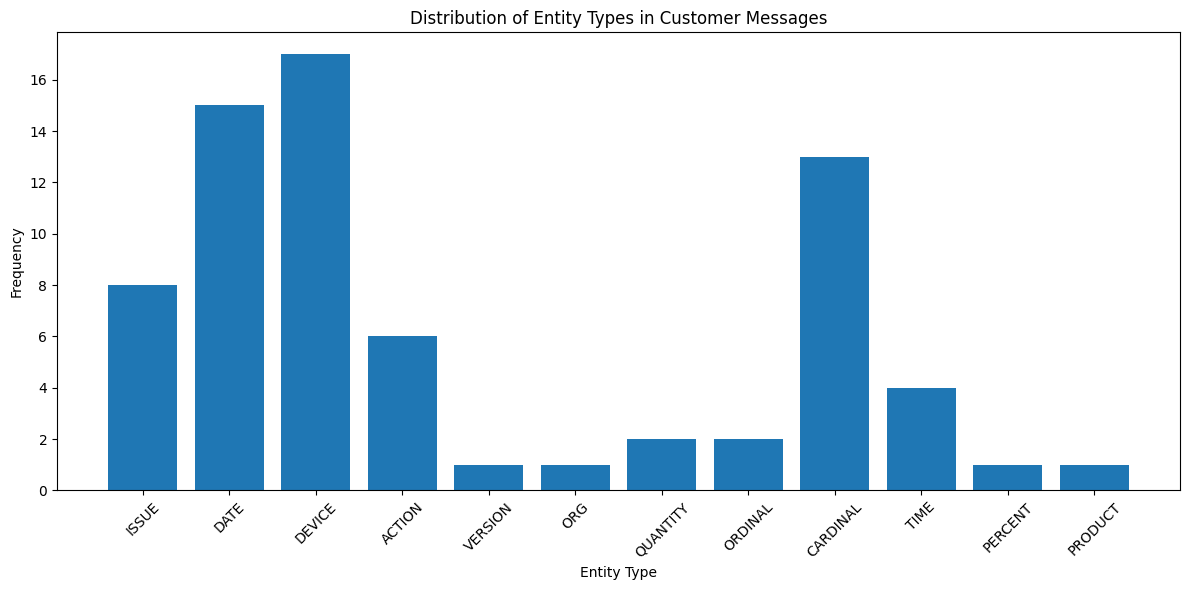

In [42]:
# Visualize entity distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
entity_types = list(entity_counts.keys())
entity_totals = [sum(entity_counts[et].values()) for et in entity_types]

plt.bar(entity_types, entity_totals)
plt.title('Distribution of Entity Types in Customer Messages')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 4: Advanced Pattern Analysis and Issue Classification




In [43]:
def create_issue_classifier(text):
    """
    Classify customer issues based on identified patterns
    """
    text = text.lower()

    # Define classification patterns
    patterns = {
        'Update Related': [
            'update', 'version', 'ios', 'latest',
            'download', 'install'
        ],
        'Device Performance': [
            'slow', 'broken', 'crash', 'freeze',
            'battery', 'speed', 'performance'
        ],
        'Connectivity': [
            'bluetooth', 'wifi', 'connection',
            'network', 'signal', 'connect'
        ],
        'Hardware Issues': [
            'speaker', 'screen', 'button',
            'keyboard', 'battery', 'hardware'
        ]
    }

    # Score each category
    scores = {}
    for category, keywords in patterns.items():
        score = sum([1 for keyword in keywords if keyword in text])
        scores[category] = score

    # Return primary and secondary categories if any
    categories = [k for k, v in scores.items() if v > 0]
    return categories if categories else ['Other']


In [44]:
# Apply classifier to customer messages
df_customers = df[df['inbound']].copy()
df_customers['issue_categories'] = df_customers['cleaned_text'].apply(create_issue_classifier)


In [45]:
# Analysis of issue categories
from itertools import chain

# Flatten all categories
all_categories = list(chain.from_iterable(df_customers['issue_categories']))
category_counts = pd.Series(all_categories).value_counts()

print("Issue Category Distribution:")
print(category_counts)

Issue Category Distribution:
Other                 29
Update Related        12
Device Performance     8
Hardware Issues        7
Connectivity           3
Name: count, dtype: int64


In [46]:
# Analyze common phrases by category
def extract_key_phrases(texts, ngram_range=(2, 3)):
    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer(ngram_range=ngram_range,
                               stop_words='english')
    X = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()

    # Get total counts for each phrase
    total_counts = X.sum(axis=0).A1

    # Get top phrases
    top_indices = total_counts.argsort()[-10:][::-1]
    return [(words[i], total_counts[i]) for i in top_indices]


Top phrases for Other:
  ive tried: 3
  times past week: 2
  past week: 2
  times past: 2
  yep ive tried: 1
  heard amp number: 1
  havent heard amp: 1
  havent recd: 1
  havent recd msg: 1
  having issues: 1

Top phrases for Update Related:
  latest version: 2
  updated phone: 2
  new update: 2
  help page turned: 1
  ios slow: 1
  ios battery runs: 1
  ios battery: 1
  immediately updated phone: 1
  immediately updated: 1
  high sierra spotify: 1

Top phrases for Device Performance:
  working warning phone: 1
  working warning: 1
  freezes minutes love: 1
  freezes minutes: 1
  finding layout cumbersome: 1
  finding layout: 1
  faves getting huge: 1
  faves getting: 1
  disgrace used days: 1
  disgrace used: 1

Top phrases for Hardware Issues:
  bluetooth speaker: 2
  version 8422857 armv7: 1
  charge 720am: 1
  disregarded tapped: 1
  disgrace used days: 1
  disgrace used: 1
  constantly android tablet: 1
  constantly android: 1
  charge 720am 803am: 1
  causing reply disregarded:

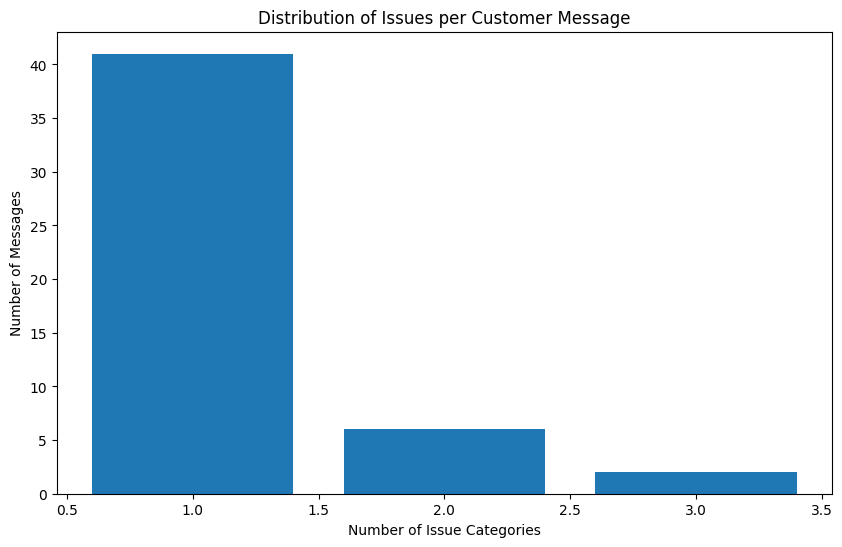

In [47]:
# Analyze phrases by category
for category in category_counts.index:
    relevant_texts = df_customers[
        df_customers['issue_categories'].apply(lambda x: category in x)
    ]['cleaned_text']

    if len(relevant_texts) > 0:
        print(f"\nTop phrases for {category}:")
        phrases = extract_key_phrases(relevant_texts)
        for phrase, count in phrases:
            print(f"  {phrase}: {count}")

# Visualization of issue complexity
plt.figure(figsize=(10, 6))
issue_counts = df_customers['issue_categories'].apply(len).value_counts()
plt.bar(issue_counts.index, issue_counts.values)
plt.title('Distribution of Issues per Customer Message')
plt.xlabel('Number of Issue Categories')
plt.ylabel('Number of Messages')
plt.show()

In [51]:
# Analyze support response patterns based on issue type
def analyze_support_responses(df_customers, df):
    """
    Analyze support responses by matching in_response_to_tweet_id
    """
    response_patterns = {}

    for idx, customer_tweet in df_customers.iterrows():
        # Find support responses where this tweet_id is mentioned in in_response_to_tweet_id
        responses = df[
            (df['in_response_to_tweet_id'].notna()) &
            (df['in_response_to_tweet_id'] == customer_tweet['tweet_id']) &
            (df['inbound'] == False)
        ]

        if not responses.empty:
            for category in customer_tweet['issue_categories']:
                if category not in response_patterns:
                    response_patterns[category] = []
                response_patterns[category].extend(responses['cleaned_text'].tolist())

    return response_patterns

# Apply the improved analysis
response_patterns = analyze_support_responses(df_customers, df)

print("Support Response Analysis by Issue Type:")
for category, responses in response_patterns.items():
    if responses:
        print(f"\n{category} (Total responses: {len(responses)}):")
        # Analyze common words in responses
        all_words = ' '.join(responses).split()
        word_counts = Counter([word.lower() for word in all_words if len(word) > 3])
        print("Common response words:", word_counts.most_common(5))

        # Calculate average response length
        avg_length = sum(len(response.split()) for response in responses) / len(responses)
        print(f"Average response length: {avg_length:.1f} words")

        # Check for common support patterns
        dm_requests = sum(1 for r in responses if 'dm' in r.lower())
        links = sum(1 for r in responses if 'http' in r.lower())
        print(f"DM requests: {dm_requests}, Links shared: {links}")

Support Response Analysis by Issue Type:

Other (Total responses: 24):
Common response words: [('this', 12), ('your', 11), ('please', 6), ('from', 5), ('about', 4)]
Average response length: 20.1 words
DM requests: 9, Links shared: 0

Update Related (Total responses: 11):
Common response words: [('help', 7), ('this', 4), ('thanks', 3), ('happy', 3), ('send', 3)]
Average response length: 22.5 words
DM requests: 6, Links shared: 0

Connectivity (Total responses: 3):
Common response words: [('could', 2), ('logging', 2), ('device', 2), ('know', 2), ('thanks', 1)]
Average response length: 22.3 words
DM requests: 1, Links shared: 0

Hardware Issues (Total responses: 6):
Common response words: [('this', 4), ('thanks', 3), ('using', 3), ('look', 3), ('could', 2)]
Average response length: 22.7 words
DM requests: 3, Links shared: 0

Device Performance (Total responses: 7):
Common response words: [('this', 6), ('help', 5), ('thanks', 3), ('look', 3), ('using', 3)]
Average response length: 22.4 wor

# Task 5: Advanced Text Analysis and Sentiment Analysis


In [52]:
from textblob import TextBlob
import re

# Helper function for sentiment analysis
def analyze_sentiment(text):
    """
    Analyze the sentiment of text using TextBlob
    Returns: sentiment polarity (-1 to 1) and subjectivity (0 to 1)
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Helper function for urgency detection
def detect_urgency(text):
    """
    Detect urgency in customer messages based on key patterns
    """
    urgency_patterns = [
        r'\b(asap|urgent|emergency|immediately|quick|help)\b',
        r'(!{2,})',  # Multiple exclamation marks
        r'\b(need|please|now)\b',
        r'(?i)(cant wait|cannot wait|right now)'
    ]

    urgency_score = sum([1 for pattern in urgency_patterns if re.search(pattern, text, re.I)])
    return urgency_score

# Create comprehensive analysis function
def analyze_customer_message(text):
    """
    Comprehensive analysis of customer support messages
    """
    # Clean text
    cleaned_text = ' '.join(text.split())

    # Get sentiment
    sentiment_polarity, sentiment_subjectivity = analyze_sentiment(cleaned_text)

    # Get urgency score
    urgency = detect_urgency(cleaned_text)

    # Detect technical terms
    tech_terms = re.findall(r'\b(app|phone|device|update|version|ios|android|software|bug|error)\b',
                           cleaned_text.lower())

    return {
        'sentiment_polarity': sentiment_polarity,
        'sentiment_subjectivity': sentiment_subjectivity,
        'urgency_score': urgency,
        'tech_terms': tech_terms
    }

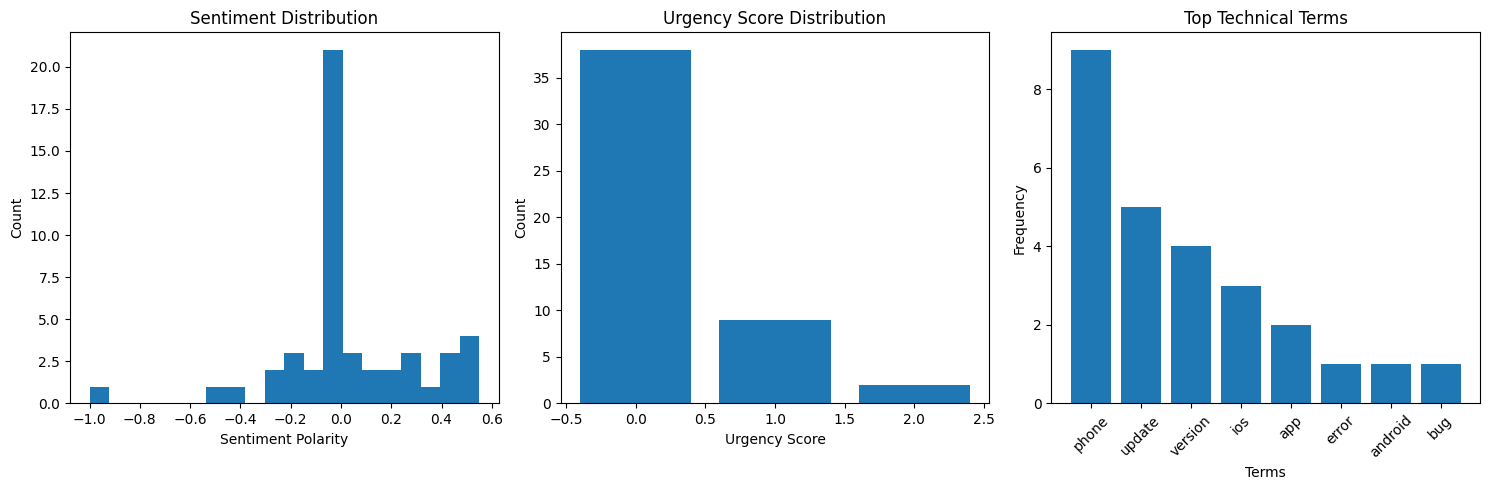

In [53]:
# Apply analysis to customer messages
df_customers = df[df['inbound']].copy()
df_customers['analysis'] = df_customers['text'].apply(analyze_customer_message)

# Extract results
df_customers['sentiment_polarity'] = df_customers['analysis'].apply(lambda x: x['sentiment_polarity'])
df_customers['urgency_score'] = df_customers['analysis'].apply(lambda x: x['urgency_score'])
df_customers['tech_terms'] = df_customers['analysis'].apply(lambda x: x['tech_terms'])

# Visualization of results
plt.figure(figsize=(15, 5))

# Sentiment distribution
plt.subplot(1, 3, 1)
plt.hist(df_customers['sentiment_polarity'], bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')

# Urgency scores
plt.subplot(1, 3, 2)
urgency_counts = df_customers['urgency_score'].value_counts().sort_index()
plt.bar(urgency_counts.index, urgency_counts.values)
plt.title('Urgency Score Distribution')
plt.xlabel('Urgency Score')
plt.ylabel('Count')

# Tech terms frequency
plt.subplot(1, 3, 3)
tech_terms = [term for terms in df_customers['tech_terms'] for term in terms]
tech_term_freq = pd.Series(tech_terms).value_counts()[:10]
plt.bar(range(len(tech_term_freq)), tech_term_freq.values)
plt.xticks(range(len(tech_term_freq)), tech_term_freq.index, rotation=45)
plt.title('Top Technical Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [54]:
# Print summary statistics
print("\nSummary Statistics:")
print("\nSentiment Analysis:")
print(f"Average Sentiment: {df_customers['sentiment_polarity'].mean():.2f}")
print(f"Negative Messages: {(df_customers['sentiment_polarity'] < 0).sum()}")
print(f"Positive Messages: {(df_customers['sentiment_polarity'] > 0).sum()}")
print(f"Neutral Messages: {(df_customers['sentiment_polarity'] == 0).sum()}")

print("\nUrgency Analysis:")
print(f"Average Urgency Score: {df_customers['urgency_score'].mean():.2f}")
print(f"High Urgency Messages (score >= 2): {(df_customers['urgency_score'] >= 2).sum()}")

print("\nMost Common Technical Issues:")
tech_term_counts = pd.Series([term for terms in df_customers['tech_terms'] for term in terms]).value_counts()
print(tech_term_counts.head())

# Create a prioritization score
df_customers['priority_score'] = (
    df_customers['urgency_score'] * 0.4 +
    (df_customers['sentiment_polarity'] < -0.2).astype(int) * 0.3 +
    df_customers['tech_terms'].str.len().clip(upper=3) * 0.3
)

print("\nHigh Priority Messages:")
high_priority = df_customers[df_customers['priority_score'] > 1.0]
print(f"\nNumber of high priority messages: {len(high_priority)}")
if len(high_priority) > 0:
    print("\nSample high priority messages:")
    for _, row in high_priority.head().iterrows():
        print(f"\nText: {row['text']}")
        print(f"Priority Score: {row['priority_score']:.2f}")
        print(f"Urgency: {row['urgency_score']}")
        print(f"Sentiment: {row['sentiment_polarity']:.2f}")
        print(f"Technical Terms: {', '.join(row['tech_terms'])}")


Summary Statistics:

Sentiment Analysis:
Average Sentiment: 0.03
Negative Messages: 14
Positive Messages: 18
Neutral Messages: 17

Urgency Analysis:
Average Urgency Score: 0.27
High Urgency Messages (score >= 2): 2

Most Common Technical Issues:
phone      9
update     5
version    4
ios        3
app        2
Name: count, dtype: int64

High Priority Messages:

Number of high priority messages: 2

Sample high priority messages:

Text: @76495 @91226 Please help! Spotify Premium skipping through songs constantly on android tablet &amp; bluetooth speaker. Tried everything!
Priority Score: 1.10
Urgency: 2
Sentiment: 0.00
Technical Terms: android

Text: @AppleSupport I have the latest version iOS. It started immediately after I updated my phone.
Priority Score: 1.30
Urgency: 1
Sentiment: 0.50
Technical Terms: version, ios, phone


# Task 6: Speech Processing

In [55]:
# Import necessary libraries
from gtts import gTTS
import os
import speech_recognition as sr
from IPython.display import Audio, display

In [56]:
def text_to_speech(text, lang='en', filename='output.mp3'):
    """
    Convert text to speech and save as audio file
    """
    try:
        # Create gTTS object
        tts = gTTS(text=text, lang=lang, slow=False)

        # Save the audio file
        tts.save(filename)

        # Create audio widget for playback in notebook
        return Audio(filename)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [58]:
# Example customer support messages for conversion
sample_texts = [
    "Hello, I'm having trouble with my phone after the latest update.",
    "My internet connection keeps dropping every few minutes.",
    "I need help accessing my account, it's showing an error message."
]



In [66]:
# Convert each sample text to speech
for i, text in enumerate(sample_texts, 1):
    print(f"\nSample {i}: {text}")
    audio = text_to_speech(text, filename=f'sample_{i}.wav')
    if audio:
        display(audio)
        print("Audio file created successfully!")


Sample 1: Hello, I'm having trouble with my phone after the latest update.


Audio file created successfully!

Sample 2: My internet connection keeps dropping every few minutes.


Audio file created successfully!

Sample 3: I need help accessing my account, it's showing an error message.


Audio file created successfully!


In [74]:
# Speech-to-Text demonstration
import os
import speech_recognition as sr
from gtts import gTTS
from pydub import AudioSegment


def text_to_speech_with_conversion(text, output_wav='output.wav'):
    """
    Convert text to speech and save as WAV file
    """
    try:
        # First create MP3
        mp3_file = 'temp.mp3'
        tts = gTTS(text=text, lang='en', slow=False)
        tts.save(mp3_file)

        # Convert MP3 to WAV using pydub
        audio = AudioSegment.from_mp3(mp3_file)
        audio.export(output_wav, format='wav')

        # Clean up the temporary MP3 file
        os.remove(mp3_file)

        return True
    except Exception as e:
        print(f"Error in text to speech conversion: {str(e)}")
        return False

def speech_to_text(wav_file):
    """
    Convert speech to text from a WAV file
    """
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(wav_file) as source:
            # Read the audio file
            audio = recognizer.record(source)

            # Use Google Speech Recognition
            text = recognizer.recognize_google(audio)
            return text

    except Exception as e:
        return f"Error in speech recognition: {str(e)}"


In [76]:
text="Hello, I'm having trouble with my phone after the latest update."

In [77]:
text_to_speech_with_conversion(text)

True

In [78]:
text = speech_to_text('/content/output.wav')
print(f"Recognized text: {text}")

Recognized text: hello I'm having trouble with my phone after the latest update
